# <font color = #119fbf>**Classificadores KNN e Árvore de Decisão**</font>

* Programa de Pós-Graduação em Engenharia Elétrica e de Computação (PPGEEC)
* Introdução à Ciências de Dados - UFC *Campus* Sobral – 2023.1
* Andressa Gomes Moreira - andressagomes@alu.ufc.br

**Importações**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors	import	KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import graphviz

### Dataset Iris 🌷🌸

O conjunto de dados **“Iris.csv”** é composto por 150 amostras e 6 atributos. Cada amostra refere-se a características da uma planta.
Os atributos listados na base de dados são:
    
1. ID;
2. SepalLengthCm - Comprimento da pétala;
3. SepalWidthCm - Largura da pétala;
4. PetalLengthCm - Comprimento da sépala;
5. PetalWidthCm - Largura da sépala;
6. Species - Tipo de espécie.

**Importação da base de dados (Dados e rótulos)**

In [2]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [3]:
print(X.shape)
print(y.shape)

(150, 2)
(150,)


**Divisão dos dados em treinamento e teste**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, shuffle=True, random_state=42)

In [5]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(135, 2)
(15, 2)
(135,)
(15,)


### Classificador KNN

* *n_neighbors* = Número de vizinhos a serem usados;
* *weights* = Função de peso usada na previsão.

In [6]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [7]:
predict = knn.predict(X_test)

print(f'acc = {accuracy_score(y_test, predict)}')
print(classification_report(y_test, predict))

acc = 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.50      0.20      0.29         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.63        15
weighted avg       0.67      0.67      0.63        15



**Visualizando o resultado**

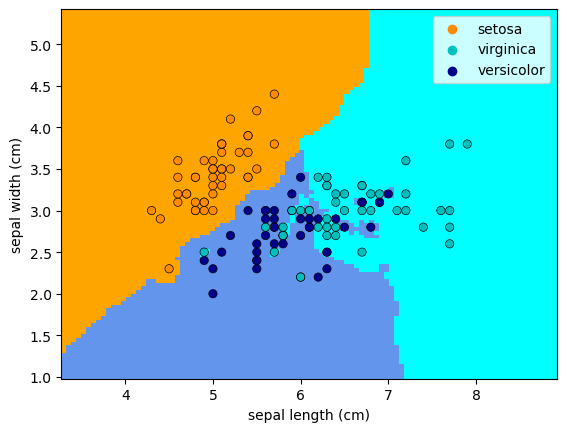

In [8]:
# Mapa de cores
cmap_light = ListedColormap(["orange",  "cornflowerblue", "cyan"])
cmap_bold = ["darkorange", "c", "darkblue"]


_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(knn, X_train, cmap=cmap_light, ax=ax, response_method="predict", plot_method="pcolormesh", 
                                       xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], shading="auto",
)

# Plot dos pontos de treinamento
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=iris.target_names[y_train], palette=cmap_bold, alpha=1.0, edgecolor="black",)

plt.show()

## Classificador Árvore de Decisão

In [9]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, shuffle=True, random_state=42)

In [10]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

**Previsões no conjunto de teste usando o classificador de Árvore de Decisão**

In [11]:
dt_predict = model_tree.predict(X_test)


print(f'acc = {accuracy_score(y_test, dt_predict)}')
print(classification_report(y_test, dt_predict))

acc = 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [12]:
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                                feature_names=iris.feature_names,
                                class_names=iris.target_names, 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH